In [91]:
%load_ext autoreload
%autoreload 2

import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import pandas as pd
import numpy as np
from datetime import datetime
from typing import Dict
import json

In [93]:
df_db_tracks = pd.read_csv('../dataset/tracks.csv')
df_db_tracks['id_artists'] = df_db_tracks['id_artists'].apply(lambda x: x[1:-1].strip().replace("'", "").split(','))
df_db_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],[3BiJGZsyX9sJchTqcSA7Su],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],[1QLBXKM5GCpyQQSVMNZqrZ],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],[1dy5WNgIKQU6ezkpZs4y8z],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],[37M5pPGs6V1fchFJSgCguX],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","[4jGPdu95icCKVF31CcFKbS, 5ebPSE9YI5aLeZ1Z2gkqjn]",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [94]:
df_db_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [95]:
df_db_artists = pd.read_csv('../dataset/artists.csv')
df_db_artists['genres'] = df_db_artists['genres'].apply(lambda x: x[1:-1].strip().replace("'", "").split(','))
df_db_artists

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0
...,...,...,...,...,...
1162090,3cOzi726Iav1toV2LRVEjp,4831.0,[black comedy],Ali Siddiq,34
1162091,6LogY6VMM3jgAE6fPzXeMl,46.0,[],Rodney Laney,2
1162092,19boQkDEIay9GaVAWkUhTa,257.0,[],Blake Wexler,10
1162093,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,[black comedy],Donnell Rawlings,15


Join Tracks table with artists table in order to bring the Genre information and Artist popularity, in the track schema

In [96]:
artist_information = df_db_artists.set_index('id').to_dict(orient='index')

In [97]:
from typing import List

def get_genres_for_artists(id_artists: List[str]) -> List[str]:
    genres = []
    for artist_id in id_artists:
        genres += artist_information[artist_id]['genres'] if artist_id in artist_information.keys() else []
    return list(set(genres))


def get_popularity_for_artists(id_artists: List[str]) -> List[int]:
    popularity = []
    for artist_id in id_artists:
        popularity += [artist_information[artist_id]['popularity']] if artist_id in artist_information.keys() else []
    return popularity


In [98]:
df_db_tracks['genres'] = df_db_tracks['id_artists'].apply(lambda x: get_genres_for_artists(x))

In [99]:
df_db_tracks['artist_popularity'] = df_db_tracks['id_artists'].apply(lambda x: get_popularity_for_artists(x))
df_db_tracks['artist_mean_popularity'] = df_db_tracks['artist_popularity'].apply(lambda x: np.mean(x) if len(x) > 0 else np.nan)
df_db_tracks['artist_max_popularity'] = df_db_tracks['artist_popularity'].apply(lambda x: np.max(x) if len(x) > 0 else np.nan)

In [100]:
df_db_tracks['release_date'] = pd.to_datetime(df_db_tracks['release_date'])
df_db_tracks['track_age'] = df_db_tracks['release_date'].apply(lambda x: (datetime.today() - x).total_seconds()//(365*24*3600))

In [101]:
df_db_tracks.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_mean_popularity,artist_max_popularity,track_age
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,574812.000000,574812.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382,50.680826,50.680826,33.573656
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162,19.959986,19.959986,23.068038
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000,38.000000,38.000000,15.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000,52.000000,52.000000,30.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000,65.000000,65.000000,48.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000,100.000000,100.000000,123.000000


In [102]:
df_db_tracks.head(3)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,artist_popularity,artist_mean_popularity,artist_max_popularity,track_age
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],[45tIt06XoI0Iio4LBEVpls],1922-02-22,0.645,0.445,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,[],[4],4.0,4.0,100.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],[14jtPCOoNZwquk5wd9DxrY],1922-06-01,0.695,0.263,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,[],[0],0.0,0.0,100.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],[5LiOoJbxVSAMkBS2fUm3X2],1922-03-21,0.434,0.177,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,"[ vintage tango, tango]",[23],23.0,23.0,100.0


1. **GENRE** TF IDF vector on genres
2. **SONG AGE** MinMax Scaler based on track age (1 newest, 0 oldest) -- possibly use bins for this
3. **TEMPO** Tempo MinMax Scaler
4. **POPULARITY** Popularity in range 0-1 (1 most popular, 0 least popular)
5. **TRACK AUDIO FEATURES** scaled either MinMax or Standard

#### Genre Representation

* Word embeddings
* TF IDF

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

import re

In [104]:
custom_vocab = ["piano", "guitar", "rock", "metal", "pop", "folk", "country", "dance", "vintage", "tango", "latin", "classic", "jazz", "lounge", "easy", "blues", "electronic", "ballad", \
    "indie", "electropop", "soul", "comedy", "rap", "alternative", "reggaeton", "reggae", "trap", "punk", "techno", "vocal", "soundtrack", "epic", "house", "deep", \
    "garage", "hiphop", "rb", "uk", "us", "polish", "french", "russian", "edm", "chill", "samba", "downtempo", "greek", "drill", "czsk"]

In [105]:
def process_genre(genre: str) -> str:
    new_genre = genre.replace('hip hop', 'hiphop')
    new_genre = genre.replace('r&b', 'rb')
    return new_genre.strip()

In [106]:
vocab = list(set([token for genres in df_db_tracks['genres'].to_list() for genre in genres for token in word_tokenize(process_genre(genre))]))
genres_text = [" ".join([process_genre(genre) for genre in track_genres]) for track_genres in df_db_tracks['genres'].to_list()]

genres_text_tokenized = []
for track_genres in df_db_tracks['genres'].to_list():
    track_genres_text = []
    for genre in track_genres:
        track_genres_text.extend(word_tokenize(process_genre(genre)))
    genres_text_tokenized.append(track_genres_text)

In [107]:
len(vocab)

2351

In [108]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize)

tfidf = tfidf.fit(vocab)

c:\Users\Fanarosss\.virtualenvs\musicos-NJQyC3x7\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [109]:
# example
tfidf.transform(['easy pop folk pop pop guitar']).toarray().shape

(1, 2351)

In [208]:
w2v_features = 10

model_w2v = Word2Vec(
    sentences=genres_text_tokenized,
    vector_size=w2v_features,
    window=10,
    min_count=1,
    workers=8
)

model_w2v.train(genres_text_tokenized, total_examples=len(genres_text_tokenized), epochs=2)

(4333905, 6915880)

In [209]:
# example
model_w2v.wv.most_similar(positive='house')

[('electro', 0.8828721046447754),
 ('edm', 0.8763574361801147),
 ('funky', 0.8201699256896973),
 ('traprun', 0.7994692921638489),
 ('mashup', 0.7948318123817444),
 ('dance', 0.7945265173912048),
 ('song', 0.7878929972648621),
 ('slap', 0.7803480625152588),
 ('bounce', 0.7715094685554504),
 ('rare', 0.766440749168396)]

In [210]:
from numpy.typing import NDArray

def create_sentence_embedding(
    sentence_tokenized: List[str],
    weights_per_word: NDArray,
    tfidf_vocab
) -> NDArray:
    sentence_vector = np.zeros(w2v_features,)
    for word in sentence_tokenized:
        weight = weights_per_word[tfidf_vocab.index(word)]
        word_vector = model_w2v.wv[word]
        word_vector = word_vector * weight
        sentence_vector += word_vector
    return sentence_vector / len(sentence_tokenized) if len(sentence_tokenized) > 0 else np.zeros(w2v_features,)


In [211]:
# tf idf weighting
tfidf_genre_weights = tfidf.transform(genres_text).toarray()

# w2v
track_genres_embeddings = [
    create_sentence_embedding(track_genres, tfidf_track_genre_weights, list(tfidf.get_feature_names_out())) 
        for track_genres, tfidf_track_genre_weights in zip(genres_text_tokenized, tfidf_genre_weights)
]


df_db_track_with_genres = pd.DataFrame(track_genres_embeddings, columns=[f"w{i+1}" for i in range(w2v_features)])
df_db_track_with_genres['id'] = df_db_tracks['id'].to_list()
df_db_track_with_genres.set_index('id', inplace=True)
df_db_track_with_genres

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
id,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
021ht4sdgPcrDgSk7JTbKY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
07A5yehtSnoedViJAZkNnc,0.289212,-3.809065,-3.151278,1.366074,-2.775645,-6.838780,-5.471141,-0.907397,0.276878,0.470186
08FmqUhxtyLTn6pAh6bk45,0.289212,-3.809065,-3.151278,1.366074,-2.775645,-6.838780,-5.471141,-0.907397,0.276878,0.470186
08y9GfoqCWfOGsKdwojr5e,-1.447250,-0.643742,1.812762,-1.222800,-1.245935,0.668405,-0.415164,0.567053,0.057157,1.291983
...,...,...,...,...,...,...,...,...,...,...
5rgu12WBIHQtvej2MdHSH0,-0.653589,0.186913,-1.341859,0.785318,-0.018717,-1.753892,0.665408,1.062735,1.978273,0.402177
0NuWgxEp51CutD2pJoF4OM,-0.462812,0.320228,0.181000,0.090615,0.427792,-0.702404,1.295888,0.156446,0.521969,-0.049450
27Y1N4Q4U3EfDU5Ubw8ws2,-0.407375,0.340889,0.368727,0.136921,0.470508,-0.902109,1.515236,0.343501,0.408652,0.085813


In [212]:
from sklearn.preprocessing import MinMaxScaler

In [213]:
scaled_features = [
    'track_age',
    'tempo',
    'popularity',
    'valence',
    'energy',
    'loudness',
    'danceability',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'artist_mean_popularity'
]

scalers: Dict[str, MinMaxScaler] = {}

for feature in scaled_features:
    scalers[feature] = MinMaxScaler()
    tempo_array = df_db_tracks[feature].to_numpy()
    tempo_array = tempo_array.reshape(-1,1)
    df_db_track_with_genres[feature] = scalers[feature].fit_transform(tempo_array)

Algorithm steps:
1. Get X playlists
2. Get all tracks from X playlists
3. Construct the above features for Y tracks
4. Hierarchical clustering to construct K clusters
5. Use the centroid of each cluster and do K-NN to find similar tracks

In [214]:
from recommender_system.algorithm.nn_recommender import NearestNeighborsRecommender
from recommender_system.algorithm.profile_creator import ProfileCreator

In [215]:
profile_creator = ProfileCreator()
nn = NearestNeighborsRecommender()

In [223]:
enhanced_tracks = nn._spotify_web_api.get_playlist_tracks_with_audio_features(
    playlist_id='2QJAhIsFNHVOs7SeheZrDW'
)
enhanced_tracks = nn._spotify_web_api.enhance_tracks_with_artist_information(enhanced_tracks)

In [224]:
enhanced_tracks_processed = []

for track in enhanced_tracks:
    
    processed_track = {
        'id': track.id,
        'popularity': track.popularity, 
        'genres': [genre for artist in track.artists for genre in artist.genres or []],
        'release_date': track.album.release_date,
        'artist_mean_popularity': np.mean([artist.popularity for artist in track.artists]) if len([artist.popularity for artist in track.artists]) > 0 else None
    }

    for key, value in track.audio_features.__dict__.items():
        processed_track[key] = value
    
    enhanced_tracks_processed.append(processed_track)


df_track_pool = pd.json_normalize(enhanced_tracks_processed)
df_track_pool['release_date'] = pd.to_datetime(df_track_pool['release_date'])
df_track_pool['track_age'] = df_track_pool['release_date'].apply(lambda x: (datetime.today() - x).total_seconds()//(365*24*3600))
df_track_pool.head(2)

,id,popularity,genres,release_date,artist_mean_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_age
0,4JHItqtk4k5wv207UO1D66,25.0,"[norwegian contemporary jazz, norwegian jazz]",2018-03-02,27.0,0.333,0.0794,7,-17.612,1,0.0363,0.951,0.00389,0.0911,0.0568,96.666,284880,4,4.0
1,4rznhkoOr1AYneKuWBef4V,34.0,"[contemporary jazz, ecm-style jazz, jazz saxop...",2018-08-31,31.0,0.302,0.0166,7,-23.504,1,0.0475,0.974,0.07140,0.0737,0.2350,69.904,360413,3,4.0


In [225]:
genres_text_pool = [" ".join([process_genre(genre) for genre in track_genres]) for track_genres in df_track_pool['genres'].to_list()]

genres_text_tokenized_pool = []
for track_genres in df_track_pool['genres'].to_list():
    track_genres_text = []
    for genre in track_genres:
        track_genres_text.extend(word_tokenize(process_genre(genre)))
    genres_text_tokenized_pool.append(track_genres_text)

# tf idf weighting
tfidf_genre_weights = tfidf.transform(genres_text_pool).toarray()

# w2v
track_genres_embeddings = [
    create_sentence_embedding(track_genres, tfidf_track_genre_weights, list(tfidf.get_feature_names_out())) 
        for track_genres, tfidf_track_genre_weights in zip(genres_text_tokenized_pool, tfidf_genre_weights)
]


df_track_pool_with_genres = pd.DataFrame(track_genres_embeddings, columns=[f"w{i+1}" for i in range(w2v_features)])
df_track_pool_with_genres['id'] = df_track_pool['id'].to_list()
df_track_pool_with_genres.set_index('id', inplace=True)

for feature in scaled_features:
    tempo_array = df_track_pool[feature].to_numpy()
    tempo_array = tempo_array.reshape(-1,1)
    df_track_pool_with_genres[feature] = scalers[feature].transform(tempo_array)

df_track_pool_with_genres.head(2)

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,track_age,tempo,popularity,valence,energy,loudness,danceability,speechiness,acousticness,instrumentalness,liveness,artist_mean_popularity
id,,,,,,,,,,,,,,,,,,,,,,
4JHItqtk4k5wv207UO1D66,0.222621,-0.015712,-1.556913,0.863229,-1.925053,0.563568,0.559410,0.412367,0.100407,2.451914,0.02459,0.392344,0.25,0.0568,0.0794,0.648372,0.336024,0.037384,0.954819,0.00389,0.0911,0.27
4rznhkoOr1AYneKuWBef4V,0.002756,-0.280668,0.179383,-0.144516,-2.541139,1.432416,-0.199182,-0.018914,-0.249161,2.275374,0.02459,0.283723,0.34,0.2350,0.0166,0.558248,0.304743,0.048919,0.977912,0.07140,0.0737,0.31


#### Clustering

In [226]:
pd.set_option('display.max_columns', 500)

In [236]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering

clustering = DBSCAN(eps=0.1, metric='cosine', min_samples=5)
# clustering = AgglomerativeClustering(n_clusters=None, metric='cosine', distance_threshold=1, linkage='complete')

columns = list(df_track_pool_with_genres.columns)
if 'cluster' in columns: columns.remove('cluster')
df_track_pool_with_genres = df_track_pool_with_genres[columns]
cluster_result = clustering.fit_predict(df_track_pool_with_genres.to_numpy(na_value=0.0))
df_track_pool_with_genres['cluster'] = cluster_result

In [237]:
df_track_pool_with_genres['cluster'].value_counts()

 0    15
-1     8
Name: cluster, dtype: int64

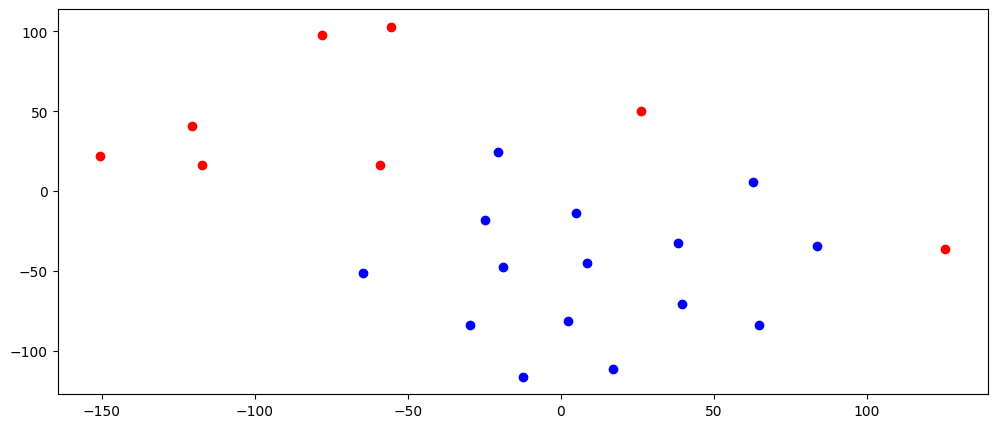

In [238]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


def tsne_plot():
    "Creates and TSNE model and plots it"
    tokens = []
    labels = []
    color_mapper = {
        -1: 'red',
        0: 'blue',
        1: 'green',
        2: 'yellow',
        3: 'purple',
        4: 'black'
    }

    data = df_track_pool_with_genres.to_dict(orient='records')

    for record in data:
        cluster = record.pop('cluster')
        labels.append(color_mapper[cluster])
        tokens.append(np.array(list(record.values())))
    
    tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(12,5)) 
    for i in range(len(x)):
        plt.scatter(x[i], y[i], c=labels[i])

    plt.show()


tsne_plot()

#### Nearest Neighbors
Use KNN to find similar tracks for each cluster centroid

In [239]:
centroids = df_track_pool_with_genres.groupby('cluster').mean()
centroids

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,track_age,tempo,popularity,valence,energy,loudness,danceability,speechiness,acousticness,instrumentalness,liveness,artist_mean_popularity
cluster,,,,,,,,,,,,,,,,,,,,,,
-1,0.184880,-0.500584,1.042293,0.501912,-0.802977,0.447242,0.252887,0.040615,-0.294272,0.284013,0.027664,0.557581,0.196250,0.416975,0.314825,0.667856,0.562815,0.083728,0.642928,0.463646,0.134675,0.421250
0,-0.072901,-0.352827,0.580271,-0.292029,-2.550662,1.642887,-0.409816,-0.165475,-0.466541,2.097521,0.077049,0.475720,0.391333,0.260280,0.251713,0.653904,0.421460,0.037872,0.846720,0.704428,0.110760,0.406722


In [240]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(
    n_neighbors=10,
    metric='cosine'
)

model.fit(
    df_db_track_with_genres.to_numpy(na_value=0.0)
)

track_db = df_db_track_with_genres.reset_index().to_dict(orient='records')

In [241]:
centroid_matrix = centroids.to_numpy()

track_recommendations = []
for eigen_track in centroid_matrix:
    neighbors = model.kneighbors(
        eigen_track.reshape(1, -1), 
        return_distance=False
    )
    for n in neighbors[0]:
        track_recommendations.append(track_db[n]['id'])

recommendations = df_db_tracks[df_db_tracks['id'].isin(track_recommendations)]

In [242]:
recommendations

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,artist_popularity,artist_mean_popularity,artist_max_popularity,track_age
69171,0tYEsmdrsv5Fi3UOn58bou,Overcome,49,270093,0,['Tricky'],[6hhA8TKRNryM8FNzqCqdDO],1995-01-01,0.814,0.5990,2,-13.007,1,0.2320,0.430,0.736000,0.0904,0.752,82.278,4,"[ electronica, art pop, nu jazz, trip hop, ...",[58],58.0,58.0,27.0
108292,07coioQpK9jzK3LIGNlwkh,Cinema Paradiso [Love Theme],45,214933,0,"['Pat Metheny', 'Charlie Haden']","[3t58jfUhoMLYVO14XaUFLA, 5Pqc0ZFA20Y9zGJZ3ojUin]",1996-01-01,0.532,0.0721,7,-18.523,0,0.0595,0.977,0.787000,0.0862,0.250,77.741,4,"[avant-garde jazz, cool jazz, jazz guitar, ...",[57],57.0,57.0,26.0
108440,385DxV3uLG88GaCUsyCyrX,Makes Me Wanna Die,46,241000,0,['Tricky'],[6hhA8TKRNryM8FNzqCqdDO],1996-01-01,0.494,0.5260,11,-10.624,1,0.1360,0.526,0.000063,0.3380,0.496,82.372,4,"[ electronica, art pop, nu jazz, trip hop, ...",[58],58.0,58.0,26.0
119056,6mbiMhNPtNTHFemMFiMcTl,'Round Midnight,41,349373,0,['Steve Kuhn'],[6KEBRNgSvb95hjK9Nh0tzt],1987-01-01,0.475,0.1330,10,-20.055,0,0.0581,0.992,0.892000,0.1380,0.144,117.857,4,"[ jazz piano, contemporary jazz, ecm-style jazz]",[47],47.0,47.0,35.0
184238,5XoUmYzWa8YTaxxV9DWEU3,Melt - Remastered,41,312333,0,['Leftfield'],[72hqBMsw7x5jnfxxwkii8L],1995-01-01,0.568,0.3060,6,-16.068,1,0.0491,0.735,0.917000,0.0890,0.301,170.079,4,"[ electronica, classic progressive house, big...",[51],51.0,51.0,27.0
184267,04hr5vtWbtWaN0qehBfBCL,Hell Is Round The Corner,43,226960,0,['Tricky'],[6hhA8TKRNryM8FNzqCqdDO],1995-01-01,0.573,0.5400,10,-12.315,1,0.1600,0.327,0.004040,0.1620,0.507,119.806,4,"[ electronica, art pop, nu jazz, trip hop, ...",[58],58.0,58.0,27.0
184325,0EZwXw5ZG0RSnrpzYHLkX1,Overcome,41,269267,0,['Tricky'],[6hhA8TKRNryM8FNzqCqdDO],1995-01-01,0.813,0.5960,2,-13.035,1,0.2260,0.412,0.765000,0.0965,0.770,82.266,4,"[ electronica, art pop, nu jazz, trip hop, ...",[58],58.0,58.0,27.0
185324,2mnDmEn04zSSXjy0DjiKPL,Suzuki,51,364453,0,['Tosca'],[0TYvluyvV1Es8lTHiBfnAn],2000-03-06,0.733,0.5610,0,-10.687,0,0.0464,0.575,0.872000,0.1310,0.568,94.999,4,"[ electronica, nu jazz, electro jazz, big be...",[51],51.0,51.0,22.0
227147,5lsR6wuL7T7vR5IOZwPaEc,Cinema Paradiso [Love Theme],41,214933,0,"['Pat Metheny', 'Charlie Haden']","[3t58jfUhoMLYVO14XaUFLA, 5Pqc0ZFA20Y9zGJZ3ojUin]",1997-01-01,0.532,0.0721,7,-18.523,0,0.0595,0.977,0.787000,0.0862,0.250,77.742,4,"[avant-garde jazz, cool jazz, jazz guitar, ...",[57],57.0,57.0,25.0
227278,70JLN0ibjDTs5hlUFTmqGq,The Moon Is A Harsh Mistress,36,244627,0,"['Pat Metheny', 'Charlie Haden']","[3t58jfUhoMLYVO14XaUFLA, 5Pqc0ZFA20Y9zGJZ3ojUin]",1997-01-01,0.380,0.1170,9,-18.228,0,0.0352,0.879,0.793000,0.0980,0.201,137.844,3,"[avant-garde jazz, cool jazz, jazz guitar, ...",[57],57.0,57.0,25.0


#### Code example of usage

In [234]:
from recommender_system.algorithm.pre_processing import BasicProcessor

processor = BasicProcessor()

processed_tracks = processor.create_track_vector_from_enhanced_track(tracks=enhanced_tracks)

In [235]:
processed_tracks